<a href="https://colab.research.google.com/github/nimendra-ag/covid-19-nlp-text-classification-sentiment-analysis/blob/main/covid_19_nlp_text_classification_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [26]:
import re
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
od.download("https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/discussion?sort=hotness")

Skipping, found downloaded files in "./covid-19-nlp-text-classification" (use force=True to force download)


In [5]:
df_covid = pd.read_csv("covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding='latin1')
df_covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
df_covid['Sentiment'].shape

(41157,)

In [8]:
df_covid.isnull().sum()

,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


In [16]:
df = df_covid[["OriginalTweet", "Sentiment"]]

In [23]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: x.lower())
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

<ipython-input-23-0e8907c3949a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: x.lower())
<ipython-input-23-0e8907c3949a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))


In [24]:
df.head()

,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Extremely Negative


<Axes: xlabel='Sentiment', ylabel='count'>

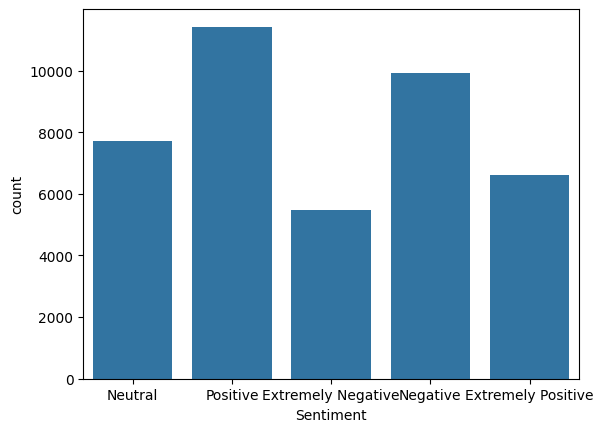

In [25]:
sns.countplot(x=df.Sentiment)

In [33]:
from collections import Counter

# Get word frequencies
word_counts = Counter(word for text in df['OriginalTweet'] for word in text.split())

# Sort words by frequency
sorted_word_counts = sorted(word_counts.values(), reverse=True)

# Calculate cumulative coverage
total_words = sum(sorted_word_counts)
coverage = [sum(sorted_word_counts[:i]) / total_words for i in [5000, 10000, 20000, 50000]]

print(f"Coverage for 5000 words: {coverage[0]:.2%}")
print(f"Coverage for 10000 words: {coverage[1]:.2%}")
print(f"Coverage for 20000 words: {coverage[2]:.2%}")
print(f"Coverage for 50000 words: {coverage[3]:.2%}")


Coverage for 5000 words: 88.23%
Coverage for 10000 words: 92.00%
Coverage for 20000 words: 94.51%
Coverage for 50000 words: 97.23%


In [36]:
unique_words = set(word for text in df['OriginalTweet'] for word in text.split())
print(f"Total unique words: {len(unique_words)}")

Total unique words: 84409


In [37]:
max_feature = 30000
tokenizer = Tokenizer(num_words=max_feature, split=' ')
tokenizer.fit_on_texts(df['OriginalTweet'])
X = tokenizer.texts_to_sequences(df['OriginalTweet'].values)
X = pad_sequences(X)

labels = df['Sentiment'].values

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=7, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, labels)

<Axes: ylabel='count'>

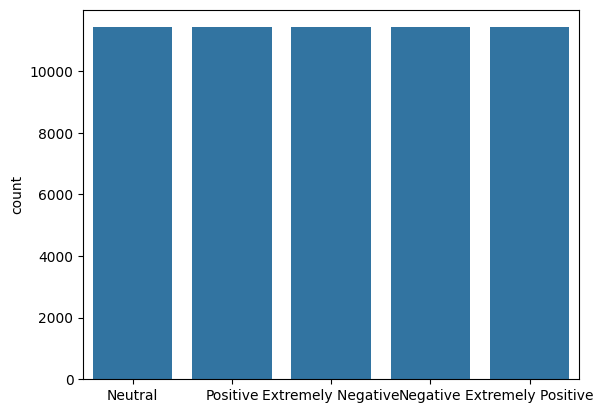

In [39]:
sns.countplot(x=y_resampled)